## 导入所需的包

In [2]:
import numpy as np
import pandas as pd
import sklearn.feature_extraction as FE
from sklearn import preprocessing

## 读取数据

In [6]:
items_df = pd.read_csv("./input/items.csv")

In [7]:
sales_train_df = pd.read_csv("./input/sales_train_v2.csv")

In [8]:
shops_df = pd.read_csv("./input/shops.csv")

In [9]:
test_df = pd.read_csv("./input/test.csv")

In [10]:
item_categories_df.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [11]:
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [12]:
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [13]:
shops_df.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [14]:
test_df.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [15]:
print ("train shape: {}, test shape: {}".format(sales_train_df.shape, test_df.shape))

train shape: (2935849, 6), test shape: (214200, 3)


In [16]:
feature_cnt = 25

## 对文本建立TFIDF矩阵
处理商品名称列

In [17]:
tfidf = FE.text.TfidfVectorizer(max_features = feature_cnt)
items_df['item_name_len'] = items_df['item_name'].map(len)
items_df['item_name_wc'] = items_df['item_name'].map(lambda x: len(str(x).split(' ')))
textFeatures = pd.DataFrame(tfidf.fit_transform(items_df['item_name']).toarray())
cols = textFeatures.columns
for i in range(feature_cnt):
    items_df['item_name_tfidf_' + str(i)] = textFeatures[cols[i]]
items_df.head()

,item_name,item_id,item_category_id,item_name_len,item_name_wc,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,item_name_tfidf_4,...,item_name_tfidf_15,item_name_tfidf_16,item_name_tfidf_17,item_name_tfidf_18,item_name_tfidf_19,item_name_tfidf_20,item_name_tfidf_21,item_name_tfidf_22,item_name_tfidf_23,item_name_tfidf_24
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,41,14,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,68,9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.403761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483839
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,45,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,47,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,***КОРОБКА (СТЕКЛО) D,4,40,43,25,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


处理商店名称列

In [18]:
feature_cnt = 25
tfidf = FE.text.TfidfVectorizer(max_features = feature_cnt)
shops_df['shop_name_len'] = shops_df['shop_name'].map(len)
shops_df['shop_name_wc'] = shops_df['shop_name'].map(lambda x: len(str(x).split(' ')))
txtFeatures = pd.DataFrame(tfidf.fit_transform(shops_df['shop_name']).toarray())
cols = txtFeatures.columns
for i in range(feature_cnt):
    shops_df['shop_name_tfidf_' + str(i)] = txtFeatures[cols[i]]
shops_df.head()

,shop_name,shop_id,shop_name_len,shop_name_wc,shop_name_tfidf_0,shop_name_tfidf_1,shop_name_tfidf_2,shop_name_tfidf_3,shop_name_tfidf_4,shop_name_tfidf_5,...,shop_name_tfidf_15,shop_name_tfidf_16,shop_name_tfidf_17,shop_name_tfidf_18,shop_name_tfidf_19,shop_name_tfidf_20,shop_name_tfidf_21,shop_name_tfidf_22,shop_name_tfidf_23,shop_name_tfidf_24
0,"!Якутск Орджоникидзе, 56 фран",0,29,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000
1,"!Якутск ТЦ ""Центральный"" фран",1,29,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.322815,0.0,0.689588,0.648274
2,"Адыгея ТЦ ""Мега""",2,16,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.498580,0.0,0.000000,0.000000
3,"Балашиха ТРК ""Октябрь-Киномир""",3,30,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000
4,"Волжский ТЦ ""Волга Молл""",4,24,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.423972,0.0,0.000000,0.000000


In [19]:
# make Monthly 添加新列“月”，“年”
sales_train_df['date'] = pd.to_datetime(sales_train_df['date'], format='%d.%m.%Y')
sales_train_df['month'] = sales_train_df['date'].dt.month
sales_train_df['year'] = sales_train_df['date'].dt.year
sales_train_df = sales_train_df.drop(['date', 'item_price'], axis = 1)
sales_train_df= sales_train_df.groupby([c for c in sales_train_df.columns if c not in ['item_cnt_day']], as_index = False)[['item_cnt_day']].sum()
sales_train_df = sales_train_df.rename(columns = {'item_cnt_day': 'item_cnt_month'})
# Monthly Mean 商品月均销售量
shop_item_monthly_mean  = sales_train_df[['shop_id', 'item_id', 'item_cnt_month']].groupby(['shop_id', 'item_id'], as_index = False)[['item_cnt_month']].mean()
shop_item_monthly_mean = shop_item_monthly_mean.rename(columns = {'item_cnt_month':'item_cnt_month_mean'})
# Add Mean Feature
sales_train_df = pd.merge(sales_train_df, shop_item_monthly_mean, how = 'left', on = ['shop_id', 'item_id'])
# Last Month
shop_item_prev_month = sales_train_df[sales_train_df['date_block_num'] == 33][['shop_id', 'item_id', 'item_cnt_month']]
shop_item_prev_month = shop_item_prev_month.rename(columns = {'item_cnt_month': 'item_cnt_prev_month'})
shop_item_prev_month.head()
# Add Previous Month Feature
sales_train_df = pd.merge(sales_train_df, shop_item_prev_month, how = 'left', on = ['shop_id', 'item_id']).fillna(0.)
# Item features
sales_train_df = pd.merge(sales_train_df, items_df, how = 'left', on = 'item_id')
# Item Category features
sales_train_df = pd.merge(sales_train_df, item_categories_df, how = 'left', on = 'item_category_id')
# Shop features
sales_train_df = pd.merge(sales_train_df, shops_df, how = 'left', on='shop_id')
sales_train_df.head()

,date_block_num,shop_id,item_id,month,year,item_cnt_month,item_cnt_month_mean,item_cnt_prev_month,item_name,item_category_id,...,shop_name_tfidf_15,shop_name_tfidf_16,shop_name_tfidf_17,shop_name_tfidf_18,shop_name_tfidf_19,shop_name_tfidf_20,shop_name_tfidf_21,shop_name_tfidf_22,shop_name_tfidf_23,shop_name_tfidf_24
0,0,0,32,1,2013,6.0,8.0,0.0,1+1,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,33,1,2013,3.0,3.0,0.0,1+1 (BD),37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,35,1,2013,1.0,7.5,0.0,10 ЛЕТ СПУСТЯ,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,43,1,2013,1.0,1.0,0.0,100 МИЛЛИОНОВ ЕВРО,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,51,1,2013,2.0,2.5,0.0,100 лучших произведений классики (mp3-CD) (Dig...,57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
test_df['month'] = 11
test_df['year'] = 2015
test_df['date_block_num'] = 34
# Add Mean Feature
test_df = pd.merge(test_df, shop_item_monthly_mean, how = 'left', on = ['shop_id', 'item_id']).fillna(0.)
# Add Previous Month Feature
test_df = pd.merge(test_df, shop_item_prev_month, how = 'left', on=['shop_id', 'item_id']).fillna(0)
# item Feature
test_df = pd.merge(test_df, items_df, how='left', on='item_id')
# item category features.
test_df = pd.merge(test_df, item_categories_df, how='left', on='item_category_id')
# shops features
test_df = pd.merge(test_df, shops_df, how='left', on='shop_id')
test_df['item_cnt_month'] = 0
test_df.head()

,ID,shop_id,item_id,month,year,date_block_num,item_cnt_month_mean,item_cnt_prev_month,item_name,item_category_id,...,shop_name_tfidf_16,shop_name_tfidf_17,shop_name_tfidf_18,shop_name_tfidf_19,shop_name_tfidf_20,shop_name_tfidf_21,shop_name_tfidf_22,shop_name_tfidf_23,shop_name_tfidf_24,item_cnt_month
0,0,5,5037,11,2015,34,1.444444,0.0,"NHL 15 [PS3, русские субтитры]",19,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,1,5,5320,11,2015,34,0.000000,0.0,ONE DIRECTION Made In The A.M.,55,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,2,5,5233,11,2015,34,2.000000,1.0,"Need for Speed Rivals (Essentials) [PS3, русск...",19,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,3,5,5232,11,2015,34,1.000000,0.0,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,4,5,5268,11,2015,34,0.000000,0.0,"Need for Speed [PS4, русская версия]",20,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


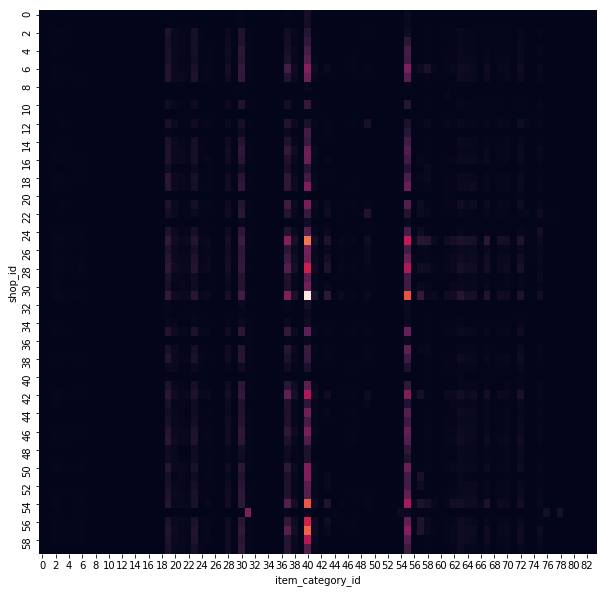

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_all = pd.concat((sales_train_df, test_df), axis=0, ignore_index=True)
stores_hm = df_all.pivot_table(index='shop_id', columns='item_category_id', values='item_cnt_month', aggfunc='count', fill_value=0)
fig, ax = plt.subplots(figsize=(10, 10))
_ = sns.heatmap(stores_hm, ax=ax, cbar=False)

## Label Encoding

In [26]:
for c in ['shop_name', 'item_name', 'item_category_name']:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(sales_train_df[c].unique()))
    sales_train_df[c] = lbl.transform(sales_train_df[c].astype(str))
    test_df[c] = lbl.transform(test_df[c].astype(str))
    print(c)

shop_name


ValueError: y contains new labels: ['12/ДВЕНАДЦАТЬ (СР) (Регион)'
 '1С:Аудиокниги. Аладдин и другие восточные сказки (Jewel)'
 '1С:Аудиокниги. Аудиокурсы по географии. 6 класс  [PC, Цифровая версия]'
 '1С:Аудиокниги. Аудиоэнциклопедия для самых маленьких. Окружающий мир (Digipack)'
 '1С:Аудиокниги. Г.Р. Хаггард. Клеопатра [PC, Цифровая версия]'
 '1С:Аудиокниги. Для самых маленьких. Сказки, потешки и песенки для детей до трех лет (Digipack)'
 '1С:Аудиокниги. Жюль Верн. Пятнадцатилетний капитан (Jewel)'
 '1С:Аудиокниги. Илья Ильин. Если бы я был робинзоном. Забавные рассказы от главного редактора журнала "Ералаш"[PC, Цифровая версия]'
 '1С:Аудиокниги. Лопатина И. Крапиты. Часть 1'
 '1С:Аудиокниги. Чарская Л. А. Сказки голубой феи    [PC, Цифровая версия]'
 '1С:Аудиотеатр. Истории о смелых и находчивых. Коллекция детских аудиоспектаклей (Digipack)'
 '1С:Аудиотеатр. Коллекция сказок А. Усачева (Digipack)'
 '1С:Аудиотеатр. Сказки для мальчиков (Digipack)'
 '1С:Бухгалтерия 8 как на ладони (издание 6)  [Цифровая версия]'
 '1С:Образовательная коллекция. Веселые правила дорожного движения. Развивающие игры для детей (Jewel)'
 '1С:Образовательная коллекция. Профессор Хиггинс. Немецкий без акцента! Версия 6.5 (Jewel)'
 '1С:Образовательная коллекция. Профессор Хиггинс. Русский без акцента! Версия 6.5 (Jewel)'
 '1С:Познавательная коллекция. Сад и огород. Энциклопедия (Digipack)'
 '1С:Школа. Математика. 3 класс.  (Jewel)'
 '1С:Школа. Окружающий мир, 2 класс [PC, Цифровая версия]'
 '1С:Школа. Русский язык,  литература, математика, окружающий мир. Игры и задачи. 1-4 классы  [PC, Цифровая версия]'
 'ABBYY Lingvo x6 Многоязычная Профессиональная версия Full (версия для скачивания) [PC, Цифровая версия]'
 'ABIS.Информационные системы на основе действий. Ивлев В.А.,Попова Т.В'
 'ADAMS BRYAN  Get Up!' 'ADELE  25' 'ADELE  25  LP' 'ADELE  25 (фирм.)'
 'ANGRY BIRDS  КОЛЛЕКЦИЯ МУЛЬТФИЛЬМОВ  Сезон 2  Том 1 (регион)'
 'Alien: Isolation [PS4, русская версия]'
 'Alien: Isolation. Коллекция [PC, Цифровая версия]'
 'Anno 2205. Season Pass [PC, Цифровая версия]'
 'Anno 2205. Ultimate Edition [PC, Цифровая версия]'
 'Anno 2205. Коллекционное издание [PC, русская версия]'
 "Assassin's Creed: Синдикат. Gold Edition [PC, Цифровая версия]"
 "Assassin's Creed: Синдикат. Season Pass [PC, Цифровая версия]"
 "Assassin's Creed: Синдикат. Биг Бен [PC, русская версия]"
 "Assassin's Creed: Синдикат. Грачи [PC, русская версия]"
 "Assassin's Creed: Синдикат. Чаринг-Кросс [PC, русская версия]"
 'BILLY`S BAND  Парижские сезоны  LP' 'BJORK  Vulnicura Strings'
 'BOCELLI ANDREA  Cinema'
 'Battlefield 4. Premium Edition [PC, Цифровая версия ePay]'
 'Battlefield 4. Premium Service [PC, Цифровая версия ePay]'
 'Battlefield Hardline. Premium Service [PC, Цифровая версия ePay]'
 'Battlefield Hardline. Standard Edition [PC, Цифровая версия ePay]'
 'Call of Duty: Black Ops III [PS3, русская версия]'
 'Call of Duty: Black Ops III [PS4, русская версия]'
 'Call of Duty: Black Ops III [Xbox 360, русская версия]'
 'Call of Duty: Black Ops III. Hardened Edition [PS4, английская версия]'
 'Call of Duty: Black Ops III. Nuketown Edition [PC, русская версия]'
 'Call of Duty: Black Ops III. Nuketown Edition [PS4, русская версия]'
 'Call of Duty: Black Ops III. Nuketown Edition [Xbox One, русская версия]'
 'Crash Time 3. Погоня без правил (PC-DVD) (Jewel)'
 'Crew. Wild Run Edition [PC, русская версия]'
 'Crew. Wild Run Edition [PS4, русская версия]'
 'Crew. Wild Run Expansion [PC, Цифровая версия]'
 'Crusader Kings 2. DLC Collection [PC, Цифровая версия]'
 'DEF LEPPARD  Def Leppard'
 'Darksiders. Franchise Pack [PC, Цифровая версия]'
 'Divinity. Original Sin: Enhanced Edition [PS4, русские субтитры]'
 'Dragon Age: Inquisition [PC, Цифровая версия ePay]'
 'Dragon Age: Inquisition. Game of the Year Edition [PC, Цифровая версия ePay]'
 'FABIAN LARA  Ma Vie Dans La Tienne'
 'FABIAN LARA  Ma Vie Dans La Tienne  CD+DVD (фирм.)'
 'FABIAN LARA  Ma Vie Dans La Tienne (фирм.)'
 'FARMER MYLENE  Bleu Noir  2LP' 'FARMER MYLENE  Interstellaires  2LP'
 'FIFA 15 [PC, Цифровая версия ePay]' 'FIFA 16 [PC, Цифровая версия ePay]'
 'FIFA 16. 2200 FIFA POINTS [PC, Цифровая версия ePay]'
 'Fallout 4 [PC, Jewel, русские субтитры]'
 'Fallout 4 [PC, русские субтитры]' 'Fallout 4 [PS4, русские субтитры]'
 'Football Manager 2016 [PC, Jewel, русская версия]'
 'GAHAN DAVE & SOULSAVERS  Angels & Ghosts' 'GARRETT DAVID  Explosive'
 'GOMEZ SELENA  Revival' 'GREGORIAN  Masters Of Chant X  The Final Chapter'
 'Guitar Hero Live. Контроллер "Гитара" [Xbox 360, английская версия]'
 'Hetman Data Recovery Pack Домашняя версия [PC, Цифровая версия]'
 'INTRONAUT  The Direction Of Last Things (фирм.)'
 'JARRE JEAN MICHEL  Electronika 1  The Time Machine'
 'Just Dance. Disney Party 2 [Xbox One, английская версия]'
 'Kaspersky Endpoint Security для бизнеса – Стандартный Russian Edition. 15-19 Node 1 year Renewal License'
 'LED ZEPPELIN  Coda  Original Recording Remastered  LP'
 'LED ZEPPELIN  In Through The Out Door  Original Recording Remastered  LP'
 'LIMP BIZKIT  Greatest Hitz' 'MINOGUE KYLIE  Kylie Christmas'
 'Movavi Screen Capture 5  (box)' 'NEWMAN JOHN  Revolve'
 'NOIZE MC  Акустика (фирм.)' 'Nanoblock Кенгуру'
 'Need for Speed Rivals. Ultimate Edition[PC, Цифровая версия ePay]'
 'Need for Speed [PS4, русская версия]'
 'Need for Speed [Xbox One, русская версия]'
 'ONE DIRECTION  Made In The A.M.'
 'ONE DIRECTION  Made In The A.M.  Deluxe Edition (фирм.)'
 'ONE DIRECTION  Made In The A.M.  Super Deluxe Edition (фирм.)'
 'PC: Гарнитура HyperX Cloud Core игровая стерео (KHX-HSCC-BK-BR)'
 'PRESLEY ELVIS  If I Can Dream  With The Royal Philharmonic Orchestra  2LP'
 'PROMT для MS Office (Только для домашнего использования) [PC, Цифровая версия]'
 'PS4: Контроллер игровой беспроводной золотой (Dualshock 4 Cont: CUH-ZCT1E: SCEE)'
 'Panda Internet Security 2016 - ESD версия - на 1 устройство - (лицензия на 1 год) [PC, Цифровая версия]'
 'Panda Mobile Security 2016 - ESD версия - на 1 устройство - (лицензия на 1 год) [PC, Цифровая версия]'
 'Plants vs Zombies: Garden Warfare [PC, Цифровая версия ePay]'
 'Pokemon XY Грохочущие Небеса Блистер'
 'Pokemon Коллекционный набор Граудон' 'Pokemon Коллекционный набор Кайогр'
 'QUEEN  The Miracle  LP' 'QUEEN  The Works  LP'
 'Rise of the Tomb Raider [Xbox 360, русская версия] (PD7-00014)'
 'Rise of the Tomb Raider [Xbox One, русская версия] (PD5-00014)'
 'Rock Band 4 (игра + гитара, барабаны и микрофон) [PS4, английская версия]'
 'SEAL  7 (фирм.)' 'STEWART ROD  Another Country'
 "Sid Meier's Railroadrs! [MAC, Цифровая версия]"
 'Skylanders SuperChargers. Интерактивная фигурка. Машины - BURN CYCLE (стихия Fire)'
 'Skylanders SuperChargers. Интерактивная фигурка. Машины - DIVE BOMBER (стихия Water)'
 'Skylanders SuperChargers. Интерактивная фигурка. Машины - SEA SHADOW (стихия Dark)'
 'Skylanders SuperChargers. Интерактивная фигурка. Машины - SKY SLICER (стихия Air)'
 'Skylanders SuperChargers. Интерактивная фигурка. Машины - STEALTH STINGER (стихия Life)'
 'Skylanders SuperChargers. Интерактивная фигурка. Суперзаряд - DIVE CLOPS (стихия Water)'
 'Skylanders SuperChargers. Интерактивная фигурка. Суперзаряд - HIGH VOLT (стихия Tech)'
 'Skylanders SuperChargers. Интерактивная фигурка. Суперзаряд - SMASH HIT (стихия Earth)'
 'Skylanders SuperChargers. Интерактивная фигурка. Суперзаряд - STORMBLADE (стихия Air)'
 'Skylanders SuperChargers. Набор для гонок из трех фигурок (стихия Water)'
 'Skylanders SuperChargers. Набор из двух фигурок (стихия Air)'
 'Skylanders SuperChargers. Набор из двух фигурок (стихия Earth)'
 'Skylanders SuperChargers. Стартовый набор [PS3, английская версия]'
 'Skylanders SuperChargers. Стартовый набор [PS4, английская версия]'
 'Skylanders SuperChargers. Стартовый набор [Xbox 360, английская версия]'
 'SoftOrbits Photo Retoucher (Домашняя обработка фото)  ESD [Цифровая версия]'
 'Star Wars: Battlefront (+ Битва за Джакку) [PS4, русская версия]'
 'Star Wars: Battlefront (+ Битва за Джакку) [Xbox One, русская версия]'
 'Star Wars: Battlefront [PC, Цифровая версия ePay]'
 'Star Wars: Battlefront [PS4, русская версия]'
 'Star Wars: Battlefront [Xbox One, русская версия]'
 'Star Wars: Battlefront. Season Pass [PC, Цифровая версия ePay]'
 'Starcraft II: Legacy Of The Void [PC, русская версия]'
 'Starcraft II: Legacy Of The Void. Коллекционное издание [PC, русская версия]'
 'THE ROLLING STONES  The Best Of The Rolling Stones  Jump Back  1971 - 1993'
 'TURUNEN TARJA  Ave Maria  En Plein Air'
 'Tales of Zestiria [PS4, русские субтитры]'
 'The Talos Principle. Deluxe Edition [PS4, английская версия]'
 'Total War: Attila. Набор "Эпоха Карла Великого" [PC, Цифровая версия]'
 'Total War: WARHAMMER (предзаказ) [PC, Цифровая версия]'
 'WARHAMMER 40000 MINIATURES: Chaos Cultists (малый набор) арт. 35-34'
 'WARHAMMER 40000 MINIATURES: Pathfinder Team арт. 56-09'
 'WARHAMMER ACCESSORIES: Citadel Base Paint Set арт. 60-22'
 'WATERS ROGER  The Wall  2CD (фирм.)' 'WATERS ROGER  The Wall  3LP'
 'WINEHOUSE AMY  Amy' 'WWE 2K16 [PS3, русская документация]'
 'WWE 2K16 [PS4, русская документация]'
 'WWE 2K16 [Xbox 360, русская документация]'
 'WWE 2K16 [Xbox One, русская документация]'
 'Warhammer 40 000. Dawn of War II. Retribution. Набор "кровавых" эффектов "Ridiculously Bloody Blood Pack" [PC, Цифровая версия]'
 "Wasteland 2: Director's Cut [PS4, русские субтитры]"
 'World of Warcraft: Warlords of Draenor (дополнение) [PC, Jewel, русская версия]'
 'XOne: Беспроводной геймпад для Xbox One "Elite" [HM3-00005]'
 'АКВАРИУМ  Радио Африка  LP' 'АКВАРИУМ  Электричество  LP'
 'АРБЕНИНА ДИАНА  Мальчик на шаре  LP'
 'АРИЯ  Легенды русского рока  1 (фирм.)'
 'АРИЯ  Легенды русского рока  2 (фирм.)' 'Артбук The Art Of Bubble'
 'Артбук Мир игры Rise Of The Tomb Raider' 'Артбук Мир игры Total War'
 'БАРМЕН' 'БЕЗ СВИДЕТЕЛЕЙ (rem)' 'БЕЛОРУССКИЙ ВОКЗАЛ (rem)'
 'БЕРСЕРК: Герои Время героев Бустер, арт. 1467'
 'БЕРСЕРК: Герои Начальный набор Время героев Илариель арт. 1490'
 'БЕРСЕРК: Герои Начальный набор Время героев Рейвенкар арт. 1489'
 'БЕРСЕРК: Герои Начальный набор Время героев Свирепый Резак арт. 1492'
 'БЕРСЕРК: Герои Начальный набор Время героев Тиша  арт. 1493'
 'БЕРСЕРК: Герои Начальный набор Время героев Хродгар арт. 1491'
 'БЕШЕНЫЕ ПСЫ (Регион)' 'БИЛАН ДИМА  Не молчи' 'БОЙЦОВСКИЙ КЛУБ'
 'БОЛЬШАЯ ПЕРЕМЕНА (1-2 СЕРИИ) (rem)' 'БОЛЬШАЯ ПЕРЕМЕНА (3-4 СЕРИИ) (rem)'
 'БОЛЬШОЙ КУШ (регион)' 'БРАТЬЯ КАРАМАЗОВЫ (Регион)'
 'БУХ.1С, №12 Декабрь 2015 [Цифровая версия]'
 'Брелок Dota 2 Pudge Hook Bottle Opener 9,5см'
 'В тылу врага 2: Штурм. Полное издание [PC, Цифровая версия]'
 'ВА-БАНКЪ  Легенды русского рока (фирм.)' 'ВЕЛИКАЯ' 'ВОИН (регион)'
 'ВОСКРЕСЕНИЕ  Легенды русского рока  1 (фирм.)'
 'ВОСХОЖДЕНИЕ ЮПИТЕР (регион)' 'ВРАГ ГОСУДАРСТВА №1 (регион)'
 'ВРЕМЯ ТАНЦОРА (rem)' 'ВЫСТРЕЛ (rem)'
 'Ведьмак 3: Дикая Охота - Дополнение "Каменные Сердца" (код загрузки, без диска, без карт) [PS4, русская версия]'
 'ГАННИБАЛ (СР-Пирамида)' 'ГЕНИЙ (Регион)' 'ГОРОД ЗЕРО (Регион)'
 'ГРАЖДАНСКАЯ ОБОРОНА  Реанимация  2LP' 'ДВЕНАДЦАТАЯ НОЧЬ (rem)'
 'ДДТ  Легенды русского рока  1 (фирм.)' 'ДЯДЯ ВАНЯ (rem)'
 'Дроид Star Wars ВВ-8 интерактивный'
 'ЗОЛОТОЙ ФОНД ОТЕЧЕСТВЕННОГО КИНО  Владимир Высоцкий  4DVD'
 'ЗОЛОТОЙ ФОНД ОТЕЧЕСТВЕННОГО КИНО  Достоевский Ф.М.  Экранизации  5DVD (rem)'
 'ЗОЛОТОЙ ФОНД ОТЕЧЕСТВЕННОГО КИНО  Зимние сказки  4DVD'
 'ИДИ И СМОТРИ (rem)' 'ИМПЕРИЯ РОБОТОВ'
 'Игровая консоль "Microsoft Xbox One 1TB гибридной памяти с геймпадом "Elite" [KG4-00062]'
 'КАРНАВАЛ (rem)' 'КВАНТ МИЛОСЕРДИЯ (ХХси)'
 'КИНО  Легенды русского рока  1 (фирм.)'
 'КИНО  Легенды русского рока  2 (фирм.)'
 'КИНО  Легенды русского рока  2LP' 'КИНО  Начальник Камчатки  LP'
 'КЛЕОПАТРА' 'КЛУБ "SHORTBUS" (Регион)'
 'КЛУБ САМОУБИЙЦ, ИЛИ ПРИКЛЮЧЕНИЯ ТИТУЛОВАННОЙ ОСОБЫ (rem)'
 'КОРОЛЬ ЛЕВ  ТРИЛОГИЯ  3DVD'
 'КРЕМАТОРИЙ  Легенды русского рока  1 (фирм.)' 'КРИД ЕГОР  Холостяк'
 'КРУГ ИРИНА  Снежная королева  LP' 'КУРЬЕР (Регион)'
 'Карта оплаты Windows: 750 рублей [Цифровая версия]'
 'Комикс Adventure Time Всё наоборот' 'Комикс Бесобой Том 4 Балор'
 'Комикс Блэксэд Том 1 Где-то среди теней Арктическая нация'
 'Комикс Время Ворона Предыстория'
 'Комикс Звёздные войны Дарт Вейдер и тюрьма-призрак'
 'Комикс Звёздные войны Дарт Мол Смертный приговор'
 'Комикс Звёздные войны Дарт Мол Сын Датомира'
 'Комикс Инок Том 4 Зверь во мне Книга 2'
 'Комикс Красная Фурия Том 3 Темное наследие Книга 1'
 'Комикс Красная Фурия Том 4 Темное наследие Книга 2'
 'Комикс Майор Гром Том 4 Как в сказке'
 'Комикс Манхэттенские проекты Том 2'
 'Комикс Метеора Том 1 Самая опасная вещь в космосе'
 'Комикс Новые люди Икс Том 1 Первые люди Икс' 'Комикс Сага Том 1'
 'Комикс Скотт Пилигрим Том 4 Скотт Пилигрим берется за ум'
 'Комикс Сорвиголова Том 2'
 'Комикс Стражи Галактики Том 1 Космические мстители'
 'Комикс Супермен Бэтмен Том 2 Супердевушка'
 'Комикс Экслибриум Том 1  И дверь откроется'
 'Компл.вопр.серт.экзам.по подс. "Междун.фин.учет" в "1С:ERP УП 2" сист. пр."1С:Пр. 8", сентябрь 2015 (1С-Паблишинг)'
 'Комплект "Microsoft Xbox 360 250GB" + "Xbox 360 Kinect (Сенсор)" (S7G-00014)'
 'Комплект "Microsoft Xbox One 1TB  + "Rise of the Tomb Raider" + Tomb Raider Definitive Edition" [KF7-00032]'
 'Комплект Sony PlayStation 4 (1Tb) Black (CUH-1208B) + Дополнительный контроллер черный'
 'Комплект Sony PlayStation 4 (1Tb) Black (CUH-1208B) + игра Call of Duty: Black Ops III'
 'Комплект Sony PlayStation 4 (1Tb) Black (CUH-1208B) + игра Star Wars: Battlefront'
 "Копия оружия Assassin's Creed Syndicate Jacob`s Cane Sword"
 "Копия оружия Assassin's Creed Syndicate Jacob`s Hidden Blade"
 'Кулон The Witcher 3 Wild Hunt Medallion' 'ЛЕВША' 'ЛЕВША (BD)'
 'ЛЕДНИКОВЫЙ ПЕРИОД 3. ЭРА ДИНОЗАВРОВ (2dvd) (ХХси)'
 'МАСТЕР  Легенды русского рока (фирм.)'
 'МЕЛАДЗЕ ВАЛЕРИЙ И КОНСТАНТИН  Полста  2CD (фирм.)'
 'МИССИЯ НЕВЫПОЛНИМА  ПЛЕМЯ ИЗГОЕВ'
 'МИССИЯ НЕВЫПОЛНИМА  ПЛЕМЯ ИЗГОЕВ (2BD)' 'МИХАИЛ БУЛГАКОВ (rem) (5DVD)'
 'МОЛЧАНИЕ ЯГНЯТ' 'МОРАЛЬНЫЙ КОДЕКС  Гибкий стан  2LP'
 'МОРАЛЬНЫЙ КОДЕКС  Сотрясение мозга  2LP' 'МОСКВА НИКОГДА НЕ СПИТ'
 'МТГ(РУС): Битва за Зендикар: Бустер, арт. 873677'
 'Манга Врата Штейна Том 3' 'Манга Переживая юность'
 'Метод.материалы "1С:Бухгалтерия государственного учреждения 8. Редакция 2. Практика применения"'
 'Метод.материалы "1С:Зарплата и Управление Персоналом 8 редакция 3. Практика применения в 2015 году"'
 'Модные девчонки. Украшения своими руками [PC, Цифровая версия]'
 'Мягкая игрушка Terraria Eye Of Cthulhu 10см'
 'Мягкая игрушка Terraria Toxic Sludge 10см'
 'Мягкая игрушка Обезьянка Вика в носочках 32см'
 'Мягкая игрушка Смеющаяся обезьяна Интерактивная' 'НАИВ  Populism (фирм.)'
 'НАСЛЕДНИКИ' 'НАСТЯ  Легенды русского рока (фирм.)'
 'НАЧАЛЬНИК ЧУКОТКИ (rem)' 'НЕОБЫКНОВЕННОЕ ПУТЕШЕСТВИЕ СЕРАФИМЫ'
 'НЕОКОНЧЕННАЯ ПЬЕСА ДЛЯ МЕХАНИЧЕСКОГО ПИАНИНО (rem)'
 'Настольная игра World Of Tanks Rush Последний бой  арт.1483'
 'Настольная игра Диксит 2' 'Настольная игра Диксит 3'
 'Настольная игра Диксит 4' 'Настольная игра Доббль'
 'Настольная игра Кубики историй Бэтмен'
 'Настольная игра Кубики историй Муми-тролли'
 'Настольная игра Манчкин Замес, арт. 1487'
 'Настольная игра Осада Асулбурга' 'ОДИН ДОМА  часть 1' 'ОРЛЕАН'
 'ОТЕЛЛО (rem)'
 'Онлайн-доступ к мат.по ист. 5–11 кл., эконом.  9–11 . и обществозн 10-11(1 год [PC, Цифровая версия]'
 'Онлайн-доступ к матер. по биологии для 5–11 кл. и химии для 8–9 кл. (на 1 год) [PC, Цифровая версия]'
 'ПЕРЕПРАВА  Часть 2' 'ПИКОВАЯ ДАМА (rem)' 'ПЛОХОЙ ХОРОШИЙ ЧЕЛОВЕК (rem)'
 'РАБА ЛЮБВИ (rem)' 'РИККИ И ФЛЭШ' 'РОЗЫГРЫШ (rem)' 'САПОЖНИК'
 'СВОЙ СРЕДИ ЧУЖИХ, ЧУЖОЙ СРЕДИ СВОИХ (rem)' 'СЕМЕН ФАРАДА (5DVD)'
 'СНАЙПЕР (регион)' 'СОЛОМЕННАЯ ШЛЯПКА (rem)'
 'СПЛИН  Реверсивная хроника событий  LP' 'СТАРИКИ-РАЗБОЙНИКИ (rem)'
 'СТЮАРТ ЛИТТЛ (регион)' 'СУПЕРМЕН 2'
 'СУРГАНОВА СВЕТЛАНА  #МируМир (фирм.)'
 'СЮТКИН ВАЛЕРИЙ И ГРУППА ТЕЛЕФОН  Лучшие песни  LP'
 'Снупи. Большое приключение [PS4, английская версия]'
 'ТЕРМИНАТОР (регион)' 'ТРАНСФОРМЕРЫ  4DVD' 'ТРАНСФОРМЕРЫ (4BD)'
 'Толстовка Batman Arkham Knight с ушками M'
 'Толстовка Minecraft Enderman Zip-up детская черная S (36-38)'
 'Учет нефинансовых активов в гос. и муниц. учрежд. на практ. прим. в "1С:БГУ 8"'
 "Фигурка Assassin's Creed Ezio POP Games 10см"
 "Фигурка Assassin's Creed Syndicate Evie 22см"
 "Фигурка Assassin's Creed Syndicate Jacob 33см"
 "Фигурка Assassin's Creed Unity Arno POP Games 10см"
 'Фигурка Breaking Bad Heisenberg Reaction 10см'
 'Фигурка Diablo Diablo POP Games 3.75"'
 'Фигурка Flashpoint Series 1 Wonder Woman 6.75"'
 'Фигурка Game Of Thrones Jon Snow Legacy Action 15см'
 'Фигурка Grindhouse Dakota 7"' 'Фигурка Heroes Of The Storm Illidan 17см'
 'Фигурка Heroes Of The Storm Nova 17см'
 'Фигурка Jonah Hex Series 1 Turnball 7"'
 'Фигурка Little Big Planet Sackboy POP Games 10см'
 'Фигурка MTG Ajani Goldmane Legacy Action 15см'
 'Фигурка MTG Jace Beleren Legacy Action 15см'
 'Фигурка Predator Closed Mouth Predator Reaction 10см'
 'Фигурка Predator Masked Predator Reaction 10см'
 'Фигурка Skyrim Dovahkiin POP Games 10см'
 'Фигурка Star Wars Bust-Ups Series 3 6-Pack'
 'Фигурка Terminator 2 Ultimate Terminator T-800 17см'
 'Фигурка Terminator Genisys T-1000 17см'
 'Фигурка Texas Chainsaw Ultimate Leatherface 17см'
 'Фигурка The Fifth Element Ruby Rhod Reaction 10см'
 'Фигурка The Simpsons Series 4 Marge Simpson Working Woman Marge 5"'
 'Фигурка WOW Arthas POP Games 10см'
 'Фигурка WOW Lady Sylvanas POP Games 10см'
 'Фигурка Walking Dead RV Walker Zombie POP TV 10см'
 "Футболка Assassin's Creed Syndicate Bronze Crest L"
 'Футболка Payday 2 Wolf Mask L' 'Футболка Starcraft 2 Marine M' 'ХИЩНИК'
 'ХОЙ ЮРИЙ И СЕКТОР ГАЗА  Вой на луну  Лучшее и неизданное (фирм.)'
 'ХРОНИКИ НАРНИИ  ПОКОРИТЕЛЬ ЗАРИ (регион)' 'ХЭНКОК (регион)'
 'ЧЕРНЫЙ КОФЕ  Легенды русского рока (фирм.)'
 'ШЕДЕВРЫ ОТЕЧЕСТВЕННОЙ МУЛЬТИПЛИКАЦИИ  Зимние сказки  4DVD'
 'ШЕДЕВРЫ ОТЕЧЕСТВЕННОЙ МУЛЬТИПЛИКАЦИИ  Пёс в сапогах  Сборник мультфильмов'
 'Шапка Doctor Who Tardis с завязками синяя'
 'Шарф Doctor Who Tardis синий 1,6м' 'Шарф Doctor Who цветной 2м'
 'ЭКИПАЖ (rem)' 'ЭЛВИН И БУРУНДУКИ 2' 'Я, РОБОТ']

## Train & Predict Models1

In [ ]:
col = [c for c in train.columns if c not in ['item_cnt_month']]
# Validation Hold OutMonth
x1 = train[train['date_block_num'] < 33]
y1 = np.log1p(x1['item_cnt_month'].clip(0., 20.))
x1 = x1[col]
x2 = train[train['date_block_num'] == 33]
y2 = np.log1p(x2['item_cnt_month'])
x2 = x2[col]

reg = ensemble.ExtraTreeRegressor(n_estimators = 25, n_jobs = -1, max_depth = 15, )
reg.fit(x1, y1)
print ("RMSE:", np.sqrt(metrics, mean_squared_error(y2.clip(0., 20.), reg.predict(x2))))
# full train
reg.fit(train[col], train['item_cnt_month'].clip(0., 20.))
test['item_cnt_month'] = reg.predict(test[col]).clip(0., 20.)
test[['ID', 'item_cnt_month']].to_csv('submission.csv', index = False)